In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Feature Scaling for 'Amount' column
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])

# Drop unused columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Set features and labels
X = df.drop('Class', axis=1)
y = df['Class']


In [7]:
# Undersample the majority class
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)

balanced_df = pd.concat([fraud, non_fraud])

# Prepare features/labels again
X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)


c:\Users\yuvan\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [10:22:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [10]:
import pickle

with open("credit_fraud_model.pkl", "wb") as f:
    pickle.dump(xgb, f)

with open("amount_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


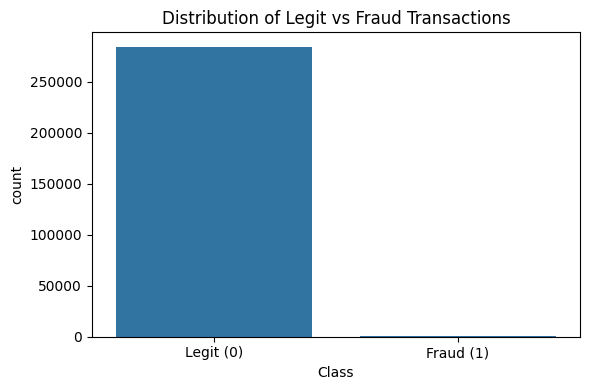

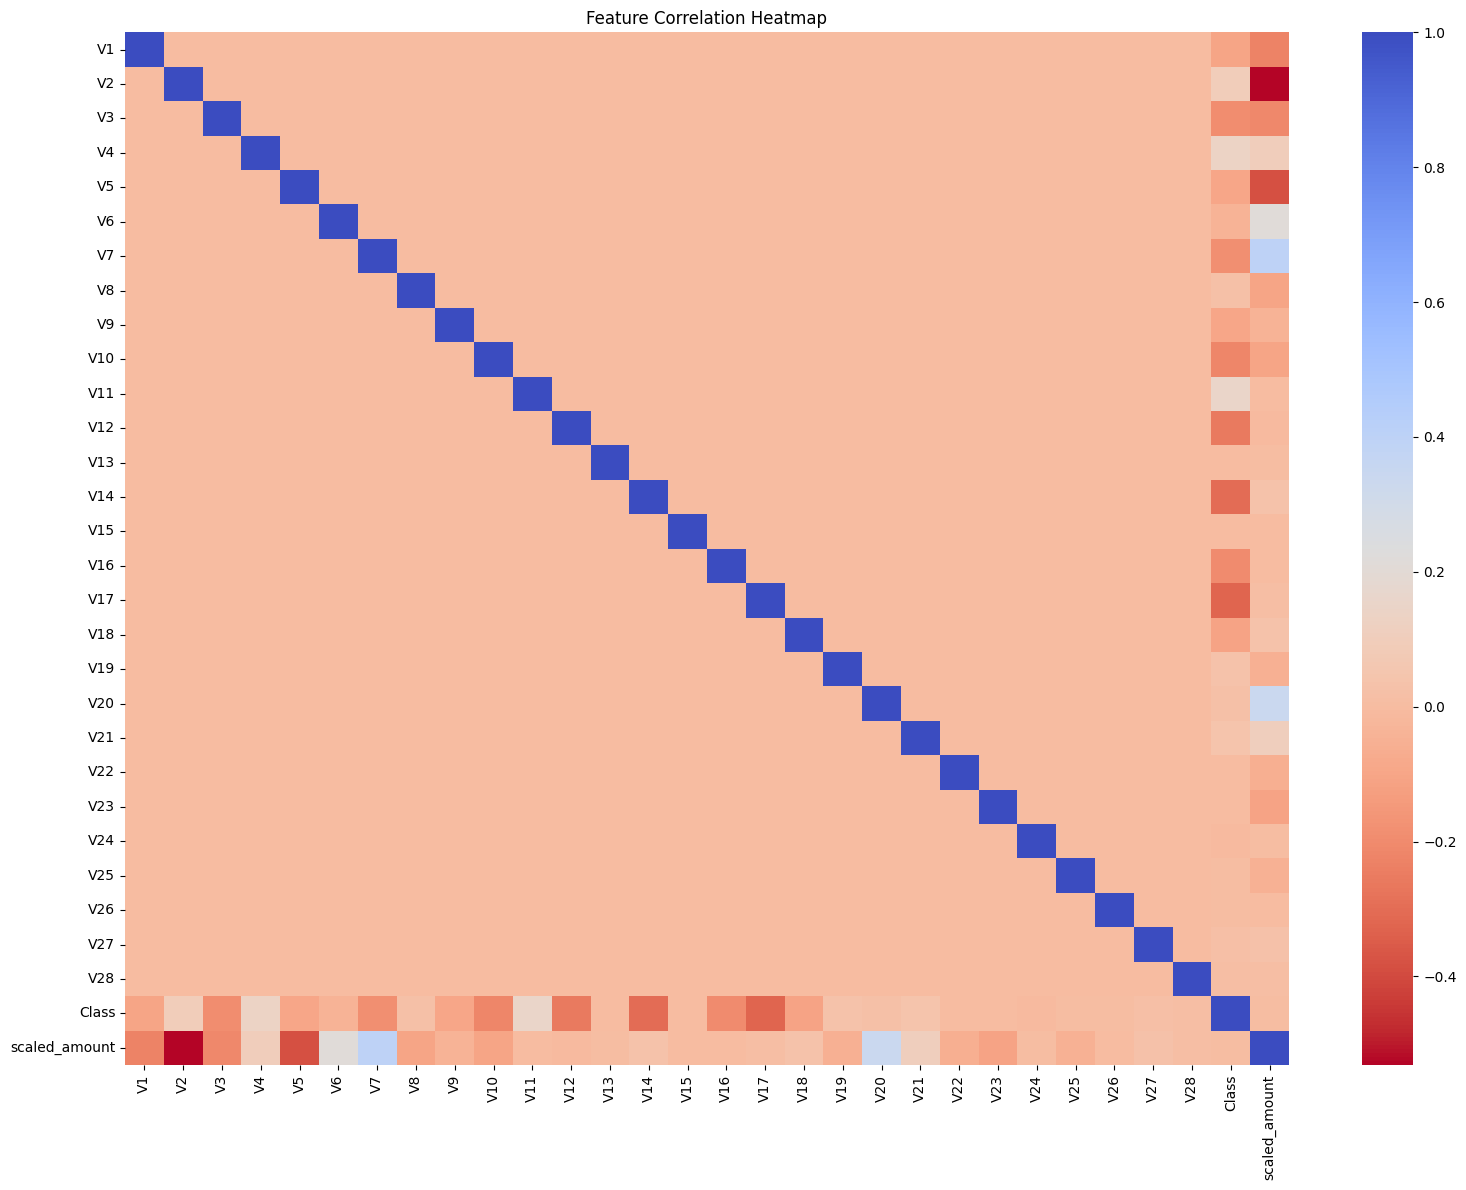

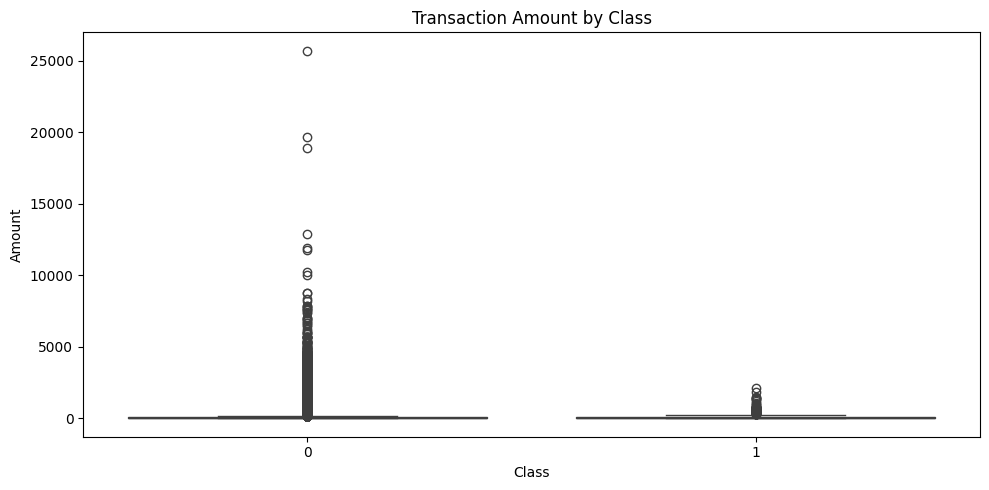

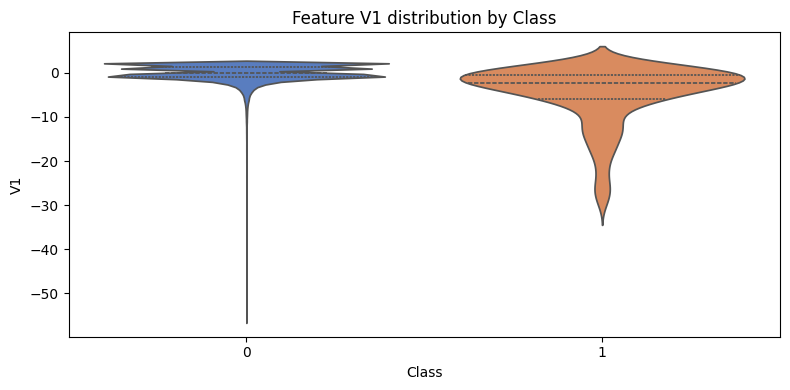

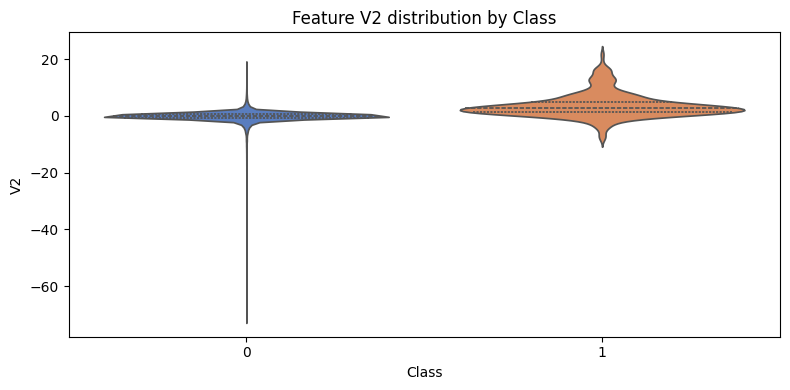

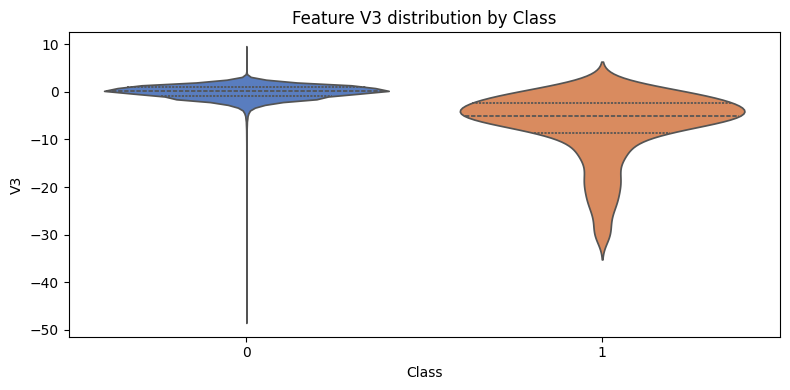

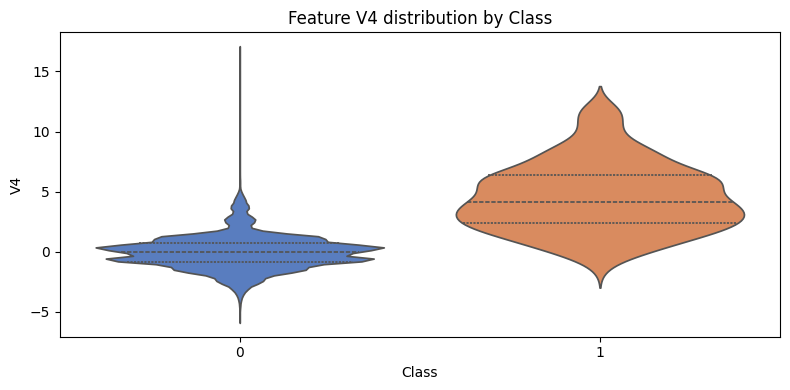

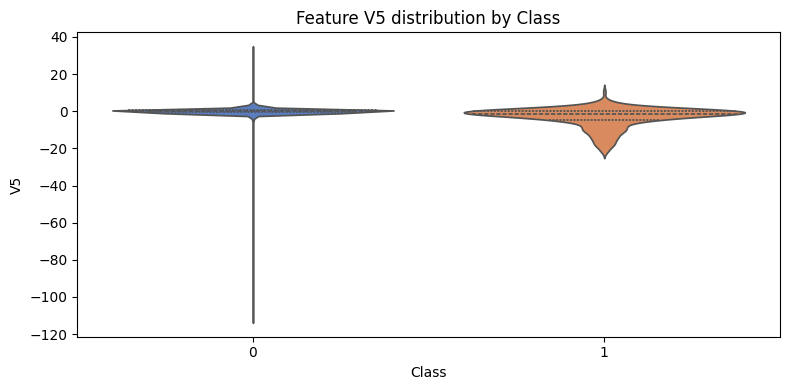

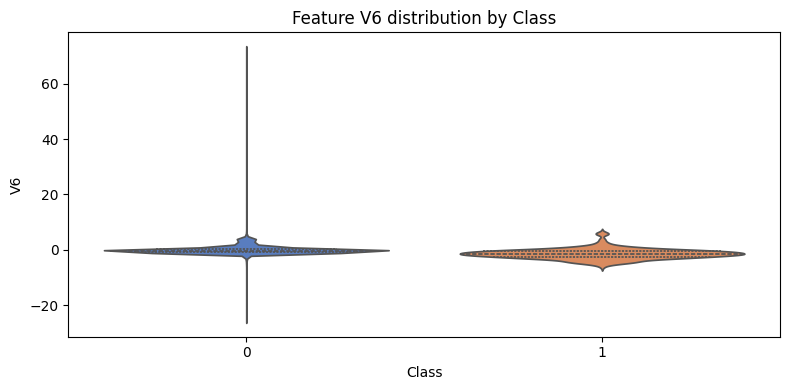

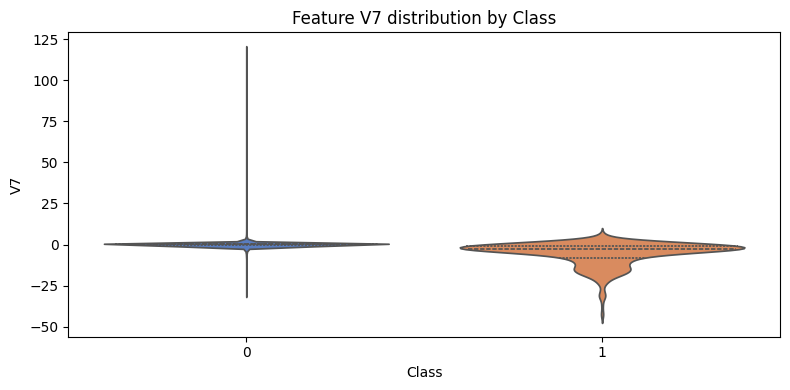

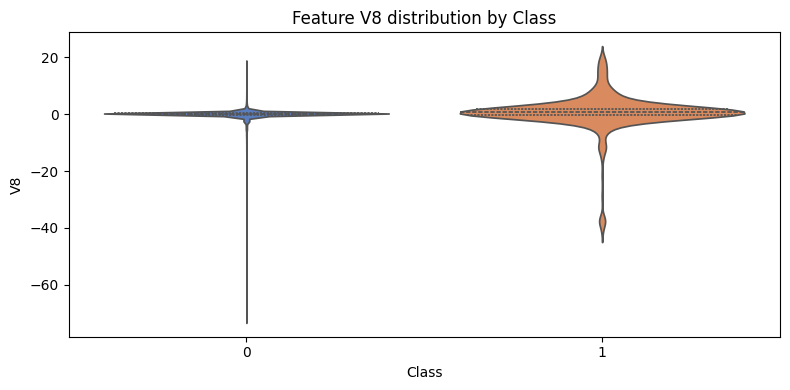

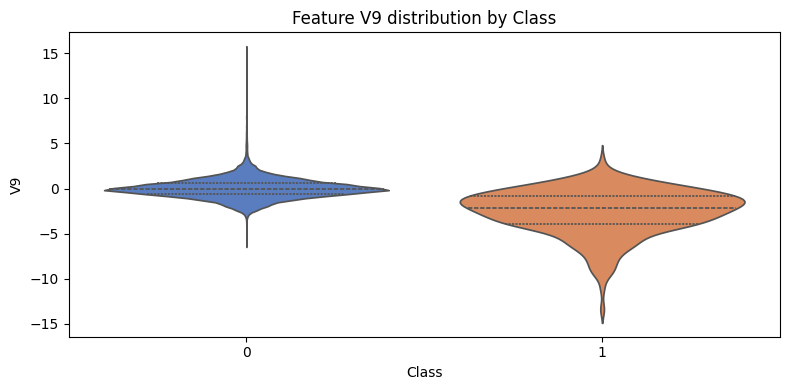

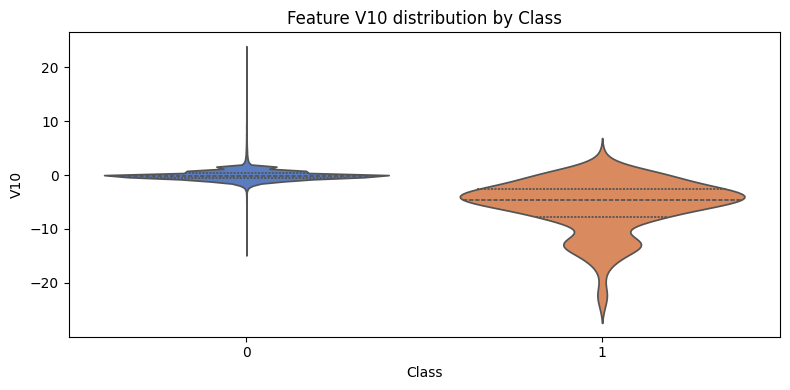

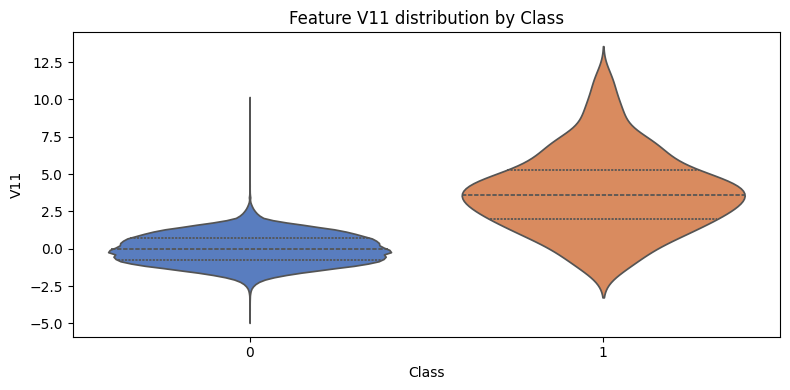

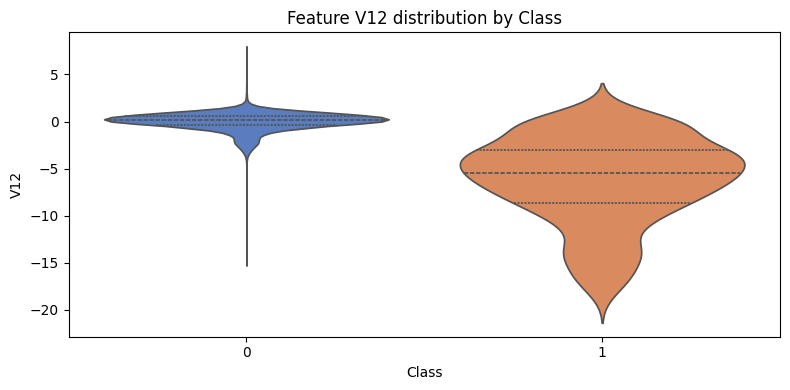

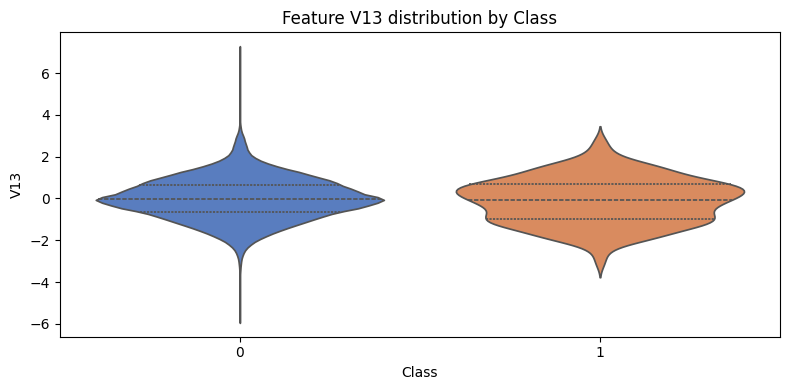

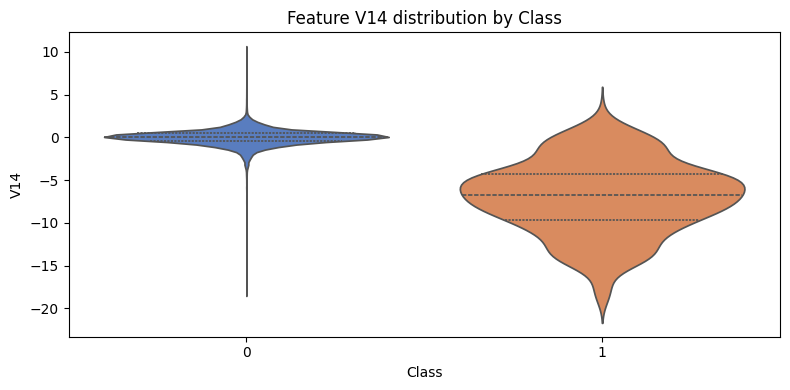

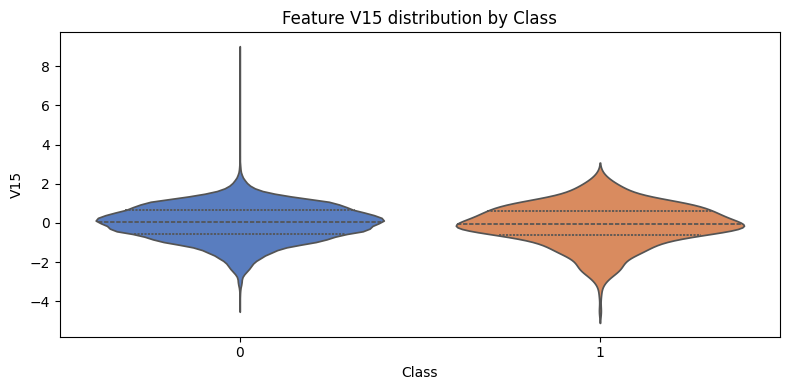

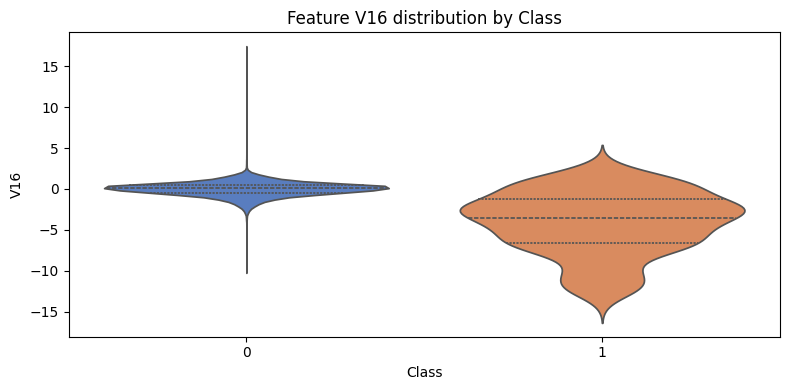

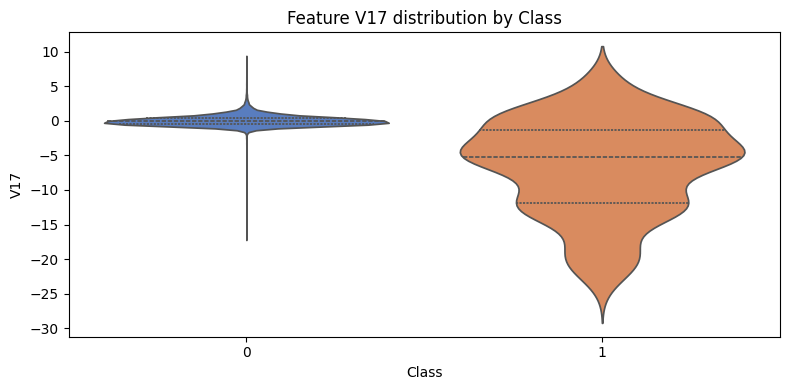

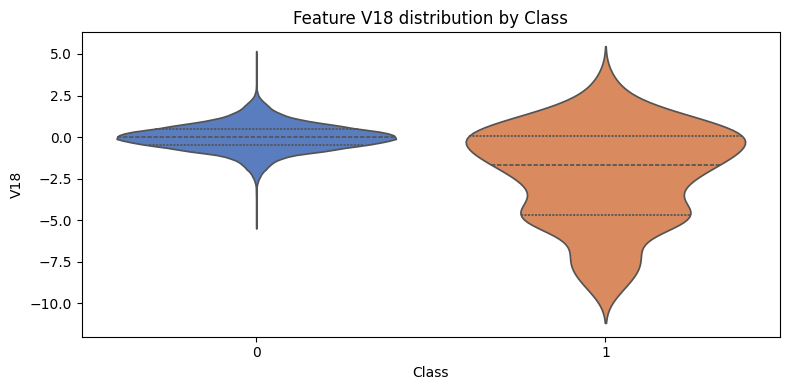

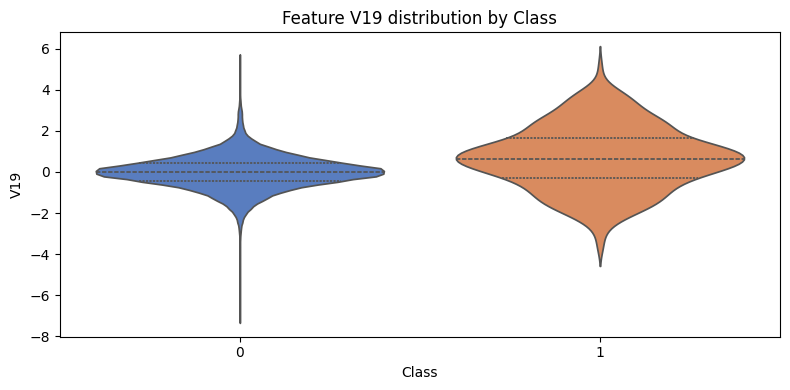

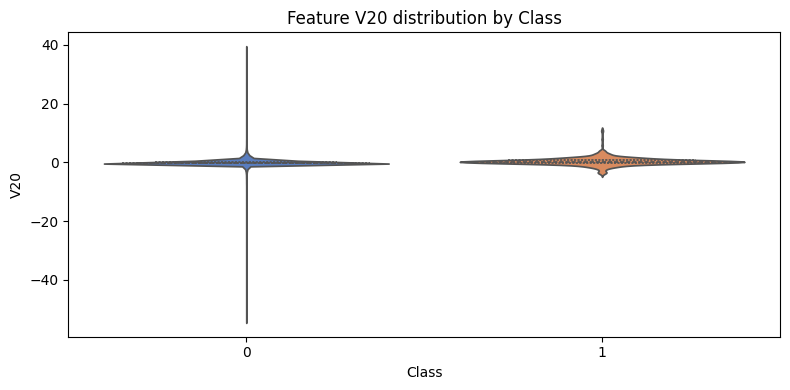

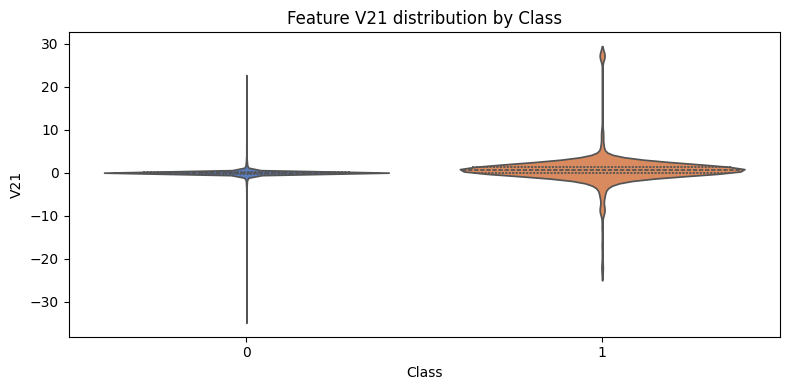

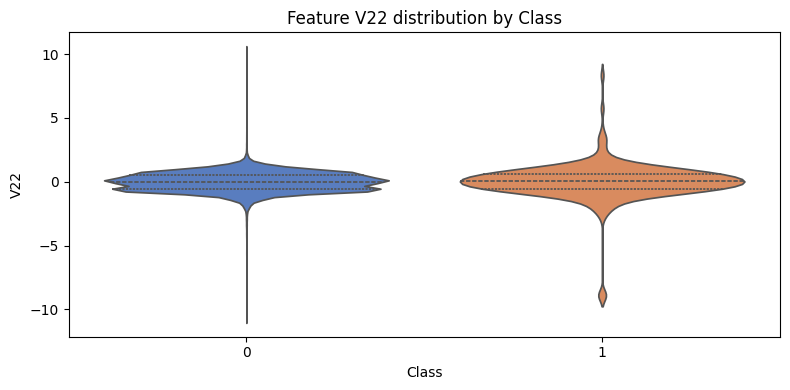

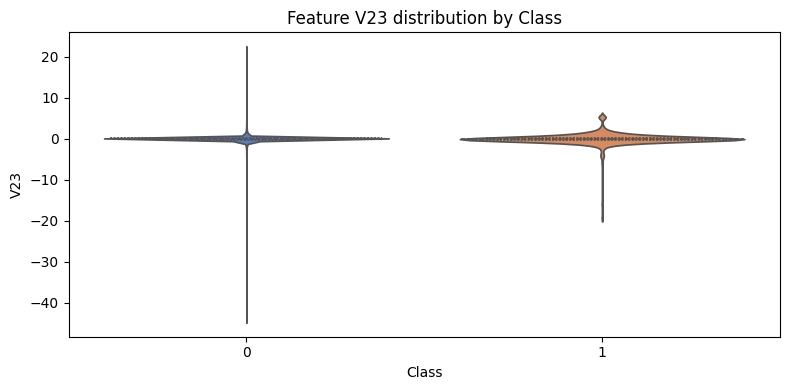

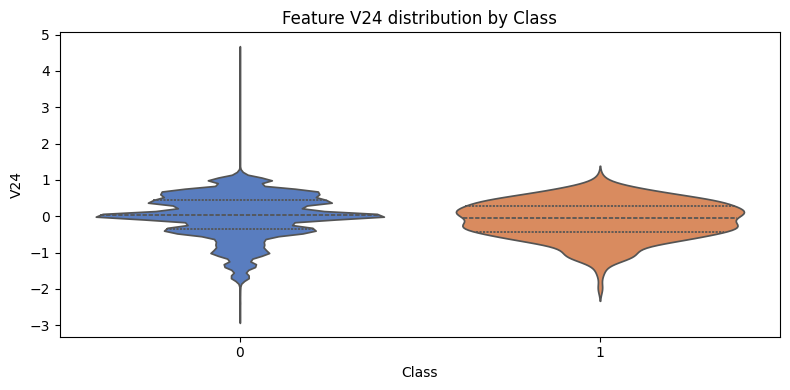

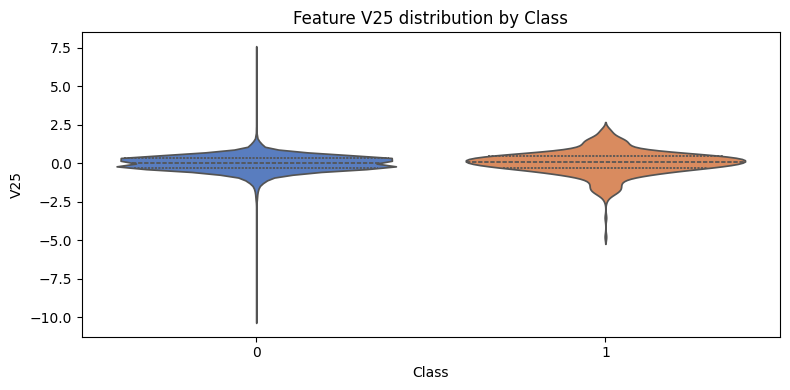

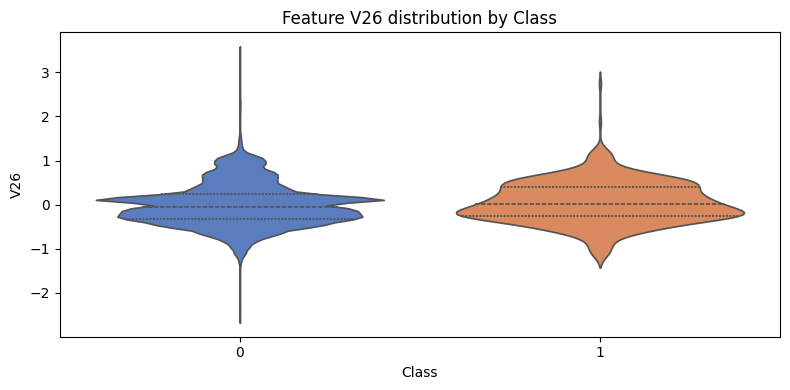

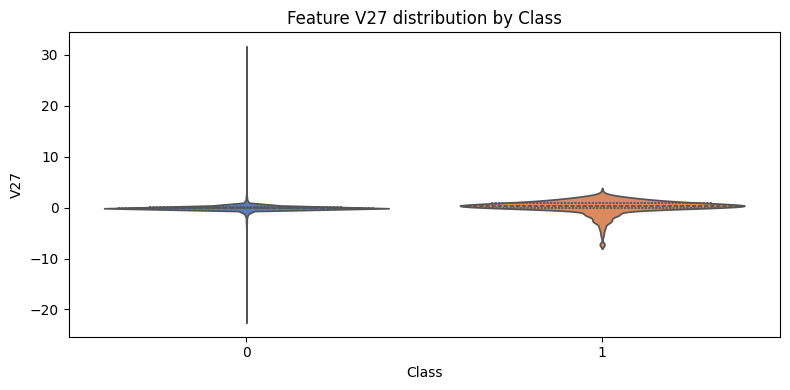

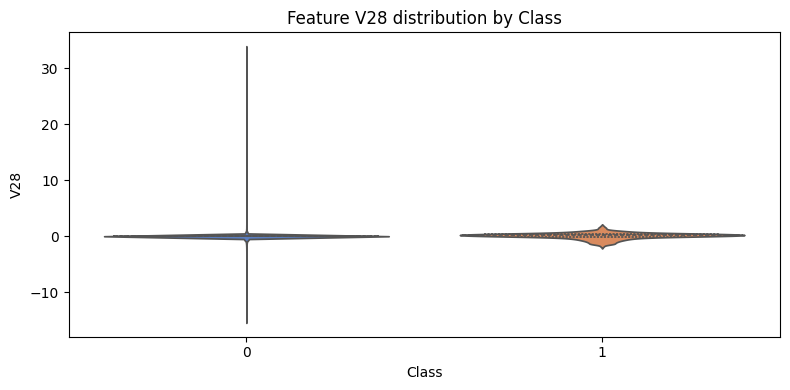

✅ Accuracy : 0.96
✅ Precision: 0.97
✅ Recall   : 0.96
✅ F1 Score : 0.96

📋 Classification Report:

              precision    recall  f1-score   support

       Legit       0.96      0.97      0.96        99
       Fraud       0.97      0.96      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



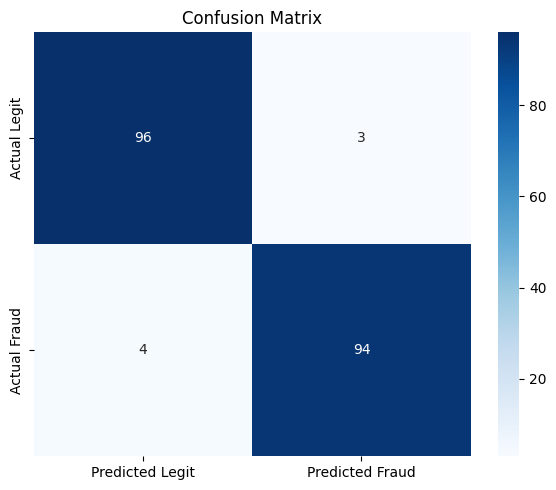

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("creditcard.csv")

# Scale 'Amount' column
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Legit vs Fraud Transactions')
plt.xticks([0, 1], ['Legit (0)', 'Fraud (1)'])
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(16, 12))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# Boxplot for transaction amount by class
df['Amount'] = scaler.inverse_transform(df[['scaled_amount']])  # inverse for visualization
plt.figure(figsize=(10, 5))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Transaction Amount by Class")
plt.tight_layout()
plt.show()

# Violin plots for PCA features (V1–V28)
for i in range(1, 29):
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='Class', y=f'V{i}', data=df, inner="quartile", palette="muted")
    plt.title(f'Feature V{i} distribution by Class')
    plt.tight_layout()
    plt.show()

# Handle class imbalance - undersample
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)
balanced_df = pd.concat([fraud, non_fraud])

# Prepare features and target
X = balanced_df.drop(['Class'], axis=1)
y = balanced_df['Class']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("✅ Accuracy :", round(accuracy, 2))
print("✅ Precision:", round(precision, 2))
print("✅ Recall   :", round(recall, 2))
print("✅ F1 Score :", round(f1, 2))
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Legit", "Fraud"]))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Predicted Legit", "Predicted Fraud"],
            yticklabels=["Actual Legit", "Actual Fraud"])
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
